 # Clustering Algorithm

## Objective:
This tutorial covers the basics of clustering algorithms, and how they work, We will:

- Explore the steps involved in implementing clustering algorithms in Python using libraries like pandas, numpy, and scikit-learn.
- Understand the importance of data preparation and feature selection when working with real-world datasets, specifically for customer segmentation.
- Learn how to prep your data for customer segmentation by calculating the required metrics
- Grasp the concept of Within-Cluster Sum of Squares (WSS) as a metric for evaluating clustering solutions,
- Gain practical experience in performing k-means clustering with the determined optimal number of clusters.



## Pre-requisites:

- Python Environment: You should have a Python environment set up on your system. If you don't have Python installed, you can download it from the [official Python website](https://www.python.org/downloads/). We recommend downloading Python 3.8 or above.
- Jupyter Notebook: This code is intended to be run in a Jupyter Notebook environment. Make sure you have [Jupyter Notebook installed](https://jupyter.org/install).
- Library Installation: Before getting started, ensure you have the following libraries installed. You can install them using pip if you haven't already:
    - NumPy: A library for numerical computations.
    - Matplotlib: A library for data visualization.
    - Pandas: A library for data manipulation and analysis.
    - Scikit-Learn: A machine learning library for various algorithms.
    - Seaborn: A library for data visualization.
    - Plotly: A library for data visualization.


To install, run the following commands:
"**!pip3 install numpy matplotlib pandas seaborn scikit-learn plotly**"

In [27]:
# Install necessary libraries
!pip3 install numpy matplotlib pandas scikit-learn seaborn plotly yellowbrick


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [161]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.preprocessing import StandardScaler

### Load the Dataset

Often, companies want to know which of their employees are loyal and would like to identify who is likely to leave. If the companies are able to identify which employee is likely to leave, it will help reduce the cost incurred while hiring and training new employees.

This dataset is designed to understand the factors that the affect employee's satisfaction levels and causes them to leave. The dataset has 14999 values and 10 features:

- satisfaction_level: The satisfaction level of employees
- last_evaluation: Employee performance evaluations.
- number_project: Number of projects an employee is working on.
- average_montly_hours: Average monthly hours an employee spends at the company.
- time_spend_company: Number of years the employee has been at the company.
- Work_accident: Any accident experienced at work (0 = Not experienced, 1 = Yes, experienced)
- left: Actual values of employees who left the organization (0= left, 1=stayed)
- promotion_last_5years: Any promotion received in the past 5 years (0= Not promoted, 1 = promoted).
- sales: Department in which the employee works
- salary: Salary the employee receives (low, medium and high)

In [29]:
hr = pd.read_csv("HR_comma_sep.csv")
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [30]:
hr.shape

(14999, 10)

## Explore Data Analysis

In [31]:
# Check for missing values
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


There are no missing values in this dataset.

In [32]:
# Summary statistics
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


We learn that: 

- **satisfaction_level**: The satisfaction levels in the dataset range from 0.09 to 1.0, with an average of around 0.61. The standard deviation indicates moderate variability in satisfaction levels.
- **last_evaluation**: The last evaluation scores range from 0.36 to 1.0, with an average around 0.72. The standard deviation suggests moderate variability in evaluation scores.
- **number_project**: Employees have worked on an average of 3.8 projects, with a range from 2 to 7. The standard deviation indicates some variability in the number of projects.
- **average_montly_hours**: Employees, on average, work around 201 hours per month, with a range from 96 to 310. The standard deviation indicates some variability in monthly hours worked.
- **time_spend_company**: Employees have spent an average of about 3.5 years with the company, with a range from 2 to 10 years. The standard deviation suggests some variability in the tenure of employees.
- **Work_accident**: On average, about 14.46% of employees have experienced a work accident. The standard deviation indicates variability in the occurrence of work accidents.
- **left**: On average, around 23.81% of employees have left the company. The standard deviation suggests variability in the turnover rate.
- **promotion_last_5years**: On average, about 2.13% of employees have been promoted in the last 5 years. The standard deviation indicates some variability in promotion rates.

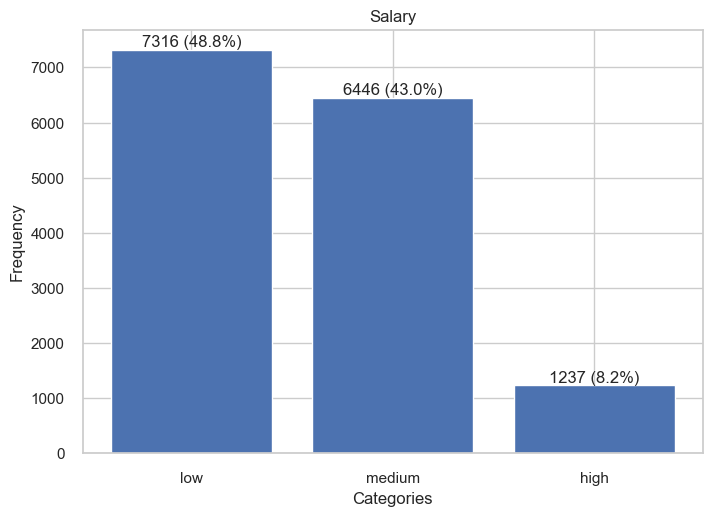

In [149]:
# Value counts for categorical variables 

# Salary
value_counts_salary= hr['salary'].value_counts()

# Calculate percentage
percentage = (value_counts_salary / len(hr)) * 100
percentage

# Plot the bar chart
fig, ax = plt.subplots()
bars = ax.bar(value_counts_salary.index, value_counts_salary)

# Add value labels on top of the bars
for bar, percent in zip(bars, percentage):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.05,
            f'{yval} ({percent:.1f}%)', ha='center', va='bottom')

# Set labels and title
ax.set_ylabel('Frequency')
ax.set_xlabel('Categories')
ax.set_title('Salary')

# Show the plot
plt.show()

8.2 percent of the organization are top level with the highest pay, 43 percent of the employees are paid a medium salary (representative of the managers) and 48.8% of the employees are paid low salary (representative of the individual contributors).

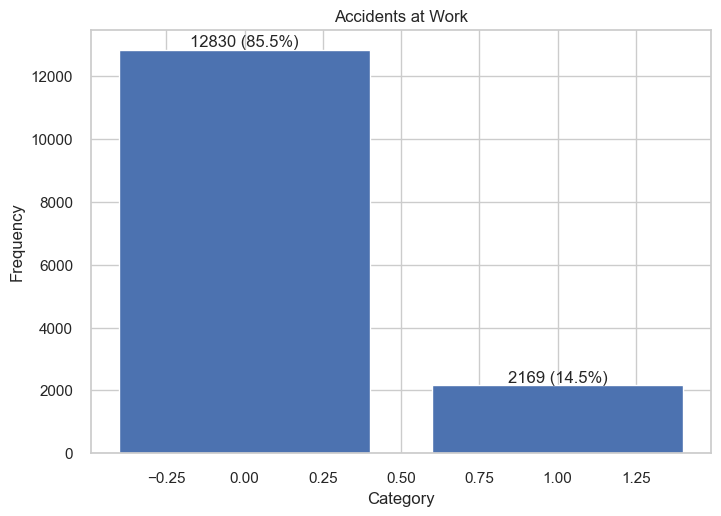

In [150]:
# Value counts for categorical variables 

# work_accident
value_counts_wa= hr['Work_accident'].value_counts()

# Calculate percentage
percentage_wa = (value_counts_wa / len(hr)) * 100
percentage_wa

# Plot the bar chart
fig, ax = plt.subplots()
bars = ax.bar(value_counts_wa.index, value_counts_wa)

# Add value labels on top of the bars
for bar, percent in zip(bars, percentage_wa):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.05,
            f'{yval} ({percent:.1f}%)', ha='center', va='bottom')

# Set labels and title
ax.set_ylabel('Frequency')
ax.set_xlabel('Category')
ax.set_title('Accidents at Work')

# Show the plot
plt.show()

Almost 85.5% of the employees have not met with accident whereas about 14% of the employees have.

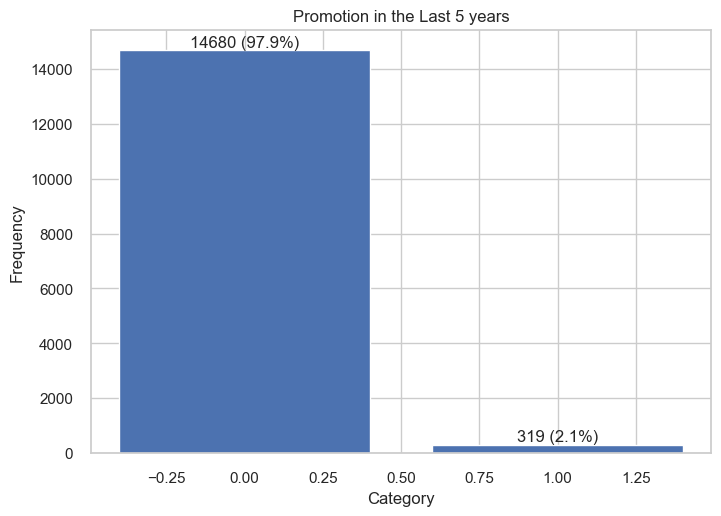

In [159]:
# Value counts for categorical variables 

# promotion_last_5years
value_counts_promo= hr['promotion_last_5years'].value_counts()
value_counts_promo

# Calculate percentage
percentage_promo = (value_counts_promo / len(hr)) * 100
percentage_promo

# Plot the bar chart
fig, ax = plt.subplots()
bars = ax.bar(value_counts_promo.index, value_counts_promo)

# Add value labels on top of the bars
for bar, percent in zip(bars, percentage_promo):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.05,
            f'{yval} ({percent:.1f}%)', ha='center', va='bottom')

# Set labels and title
ax.set_ylabel('Frequency')
ax.set_xlabel('Category')
ax.set_title('Promotion in the Last 5 years')

# Show the plot
plt.show()

97 percent (14680 employees) have not recieved a promotion in the last 5 years and only approximayely 2 percent (319 employees) have recieved the promotion. 

### Data Pre-processing

In [36]:
# Creating New Data Set Salary
salary = hr.copy()
salary['salary_num'] = np.where(salary['salary'] == 'low', 10, np.where(salary['salary'] == 'medium', 20, 30))
salary = salary.drop(['salary', 'sales'], axis=1)
salary.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_num
0,0.38,0.53,2,157,3,0,1,0,10
1,0.80,0.86,5,262,6,0,1,0,20
2,0.11,0.88,7,272,4,0,1,0,20
3,0.72,0.87,5,223,5,0,1,0,10
4,0.37,0.52,2,159,3,0,1,0,10


Here, we: 
- Create a new dataset called ‘salary’ where we encoded the alphanumeric variable ‘salary’ to the one with numerical values.
- The variable ‘sales’ was de-slected and the ‘salary’ dataset now contains 9 variables for 14999 observations.

In [37]:
# Data set without left
salary_ca = salary.drop('left', axis=1)
salary_ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   salary_num             14999 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 937.6 KB


Dataset ‘salary_ca’ was created where the variable ‘left’ was deselected. It is this dataset which will be standardized and scaled for accruately evaluating the profiles of the employees.

In [160]:
# View the current dataset
salary_ca

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_num
0,0.38,0.53,2,157,3,0,0,10
1,0.80,0.86,5,262,6,0,0,20
2,0.11,0.88,7,272,4,0,0,20
3,0.72,0.87,5,223,5,0,0,10
4,0.37,0.52,2,159,3,0,0,10
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,10
14995,0.37,0.48,2,160,3,0,0,10
14996,0.37,0.53,2,143,3,0,0,10
14997,0.11,0.96,6,280,4,0,0,10


The values within dataset vary. For instance, values for satisfaction level are much smaller than that of average monthly hours. Hence, we need to scale the values to normalize the data for accurate analysis.

In [38]:
# Standardize

scaler = StandardScaler()
salary_ca_std = scaler.fit_transform(salary_ca)
salary_ca_std

array([[-0.93649469, -1.08727529, -1.46286291, ..., -0.41116529,
        -0.14741182, -0.93336794],
       [ 0.75281433,  0.84070693,  0.97111292, ..., -0.41116529,
        -0.14741182,  0.63609235],
       [-2.02247906,  0.95755433,  2.59376348, ..., -0.41116529,
        -0.14741182,  0.63609235],
       ...,
       [-0.97671633, -1.08727529, -1.46286291, ..., -0.41116529,
        -0.14741182, -0.93336794],
       [-2.02247906,  1.42494396,  1.7824382 , ..., -0.41116529,
        -0.14741182, -0.93336794],
       [-0.97671633, -1.14569899, -1.46286291, ..., -0.41116529,
        -0.14741182, -0.93336794]])

Standardization and scaling are employed with the purpose of normalizing the raw data values and assigning a singular format to numbers for accurate analysis.

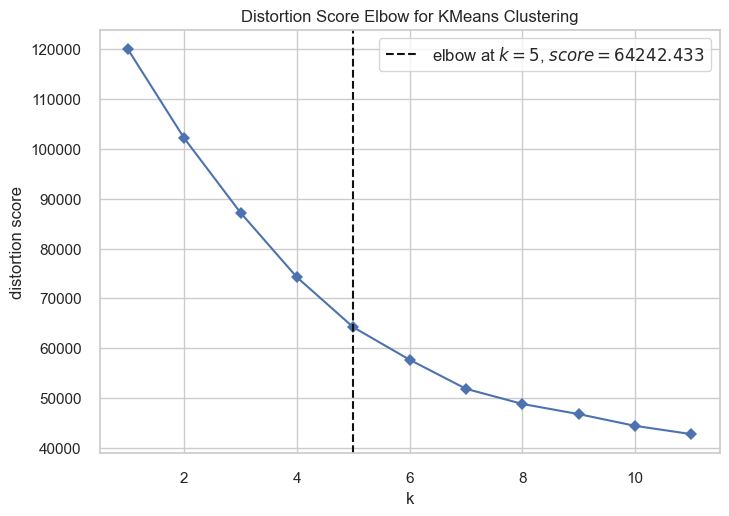

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [78]:
# Number of Clusters
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(1, 12), timings=False)
visualizer.fit(salary_ca_std)
visualizer.show()

Optimal number of clusters for the data set are decided by caluclating the distortion values. Distortion scores refer to the sum of squared distances between each data point and its assigned centroid within a cluster. This sum is often used as a measure of how well the data is clustered. A lower distortion score indicates tighter clusters. Meaning, that a lower distortion score represents that the clusters are tightly organized and closer to its assigned center, reflecting the strength of how similar they are. 

In [75]:
# Creating 5 clusters
kmeans = KMeans(n_clusters=5, random_state=12345, n_init=10)
fit = kmeans.fit(salary_ca_std)

5 clusters were created to the standardized data based on the the measure of compactness of the plot produced. 

In [162]:
# Adding a new column of clusters assigned to each value to our original dataset
salary_scored = pd.concat([salary, pd.Series(fit.labels_, name='cluster')], axis=1)
salary_scored

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_num,cluster
0,0.38,0.53,2,157,3,0,1,0,10,1
1,0.80,0.86,5,262,6,0,1,0,20,3
2,0.11,0.88,7,272,4,0,1,0,20,2
3,0.72,0.87,5,223,5,0,1,0,10,3
4,0.37,0.52,2,159,3,0,1,0,10,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,10,1
14995,0.37,0.48,2,160,3,0,1,0,10,1
14996,0.37,0.53,2,143,3,0,1,0,10,1
14997,0.11,0.96,6,280,4,0,1,0,10,2


We augmented the original datanto analyze or visualize the results alongside the original data.
By adding a new column named 'cluster' to the original data frane (salary) has allowed us to see which cluster each data point belongs to. Understanding the cluster assignment for each data point can help in interpreting the results of the clustering algorithm. It provides a way to group similar patterns together, which might have implications for understanding organizational structures, identifying anomalies, or tailoring strategies for different groups.

After adding the cluster labels to the original data, we will perform analyses. For example, we will profile each cluster, visualize the distribution within each cluster, and explore other patterns and relationships.

In [126]:
# Profiling
summary = salary_scored.groupby('cluster').agg(
    left=('left', 'mean'),
    n=('left', 'count'),
    salary_num=('salary_num', 'mean'),
    satisfaction_level=('satisfaction_level', 'mean'),
    last_evaluation=('last_evaluation', 'mean'),
    number_project=('number_project', 'mean'),
    average_montly_hours=('average_montly_hours', 'mean'),
    time_spend_company=('time_spend_company', 'mean'),
    Work_accident=('Work_accident', 'mean'),
    promotion_last_5years=('promotion_last_5years', 'mean')
).reset_index()

summary

,cluster,left,n,salary_num,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0,0.061795,2039,16.017656,0.661839,0.708995,3.735655,197.621383,3.452182,1.000000,0.0
1,1,0.378399,3972,15.191339,0.510453,0.555463,2.811934,157.278197,3.140987,0.000000,0.0
2,2,0.547875,1765,15.376771,0.188963,0.810136,5.582436,248.524646,4.530878,0.030595,0.0
3,3,0.138470,6904,16.310834,0.763628,0.787045,3.940614,215.164687,3.422509,0.000000,0.0
4,4,0.059561,319,20.188088,0.656019,0.706019,3.752351,199.849530,4.166144,0.238245,1.0


### Analysis

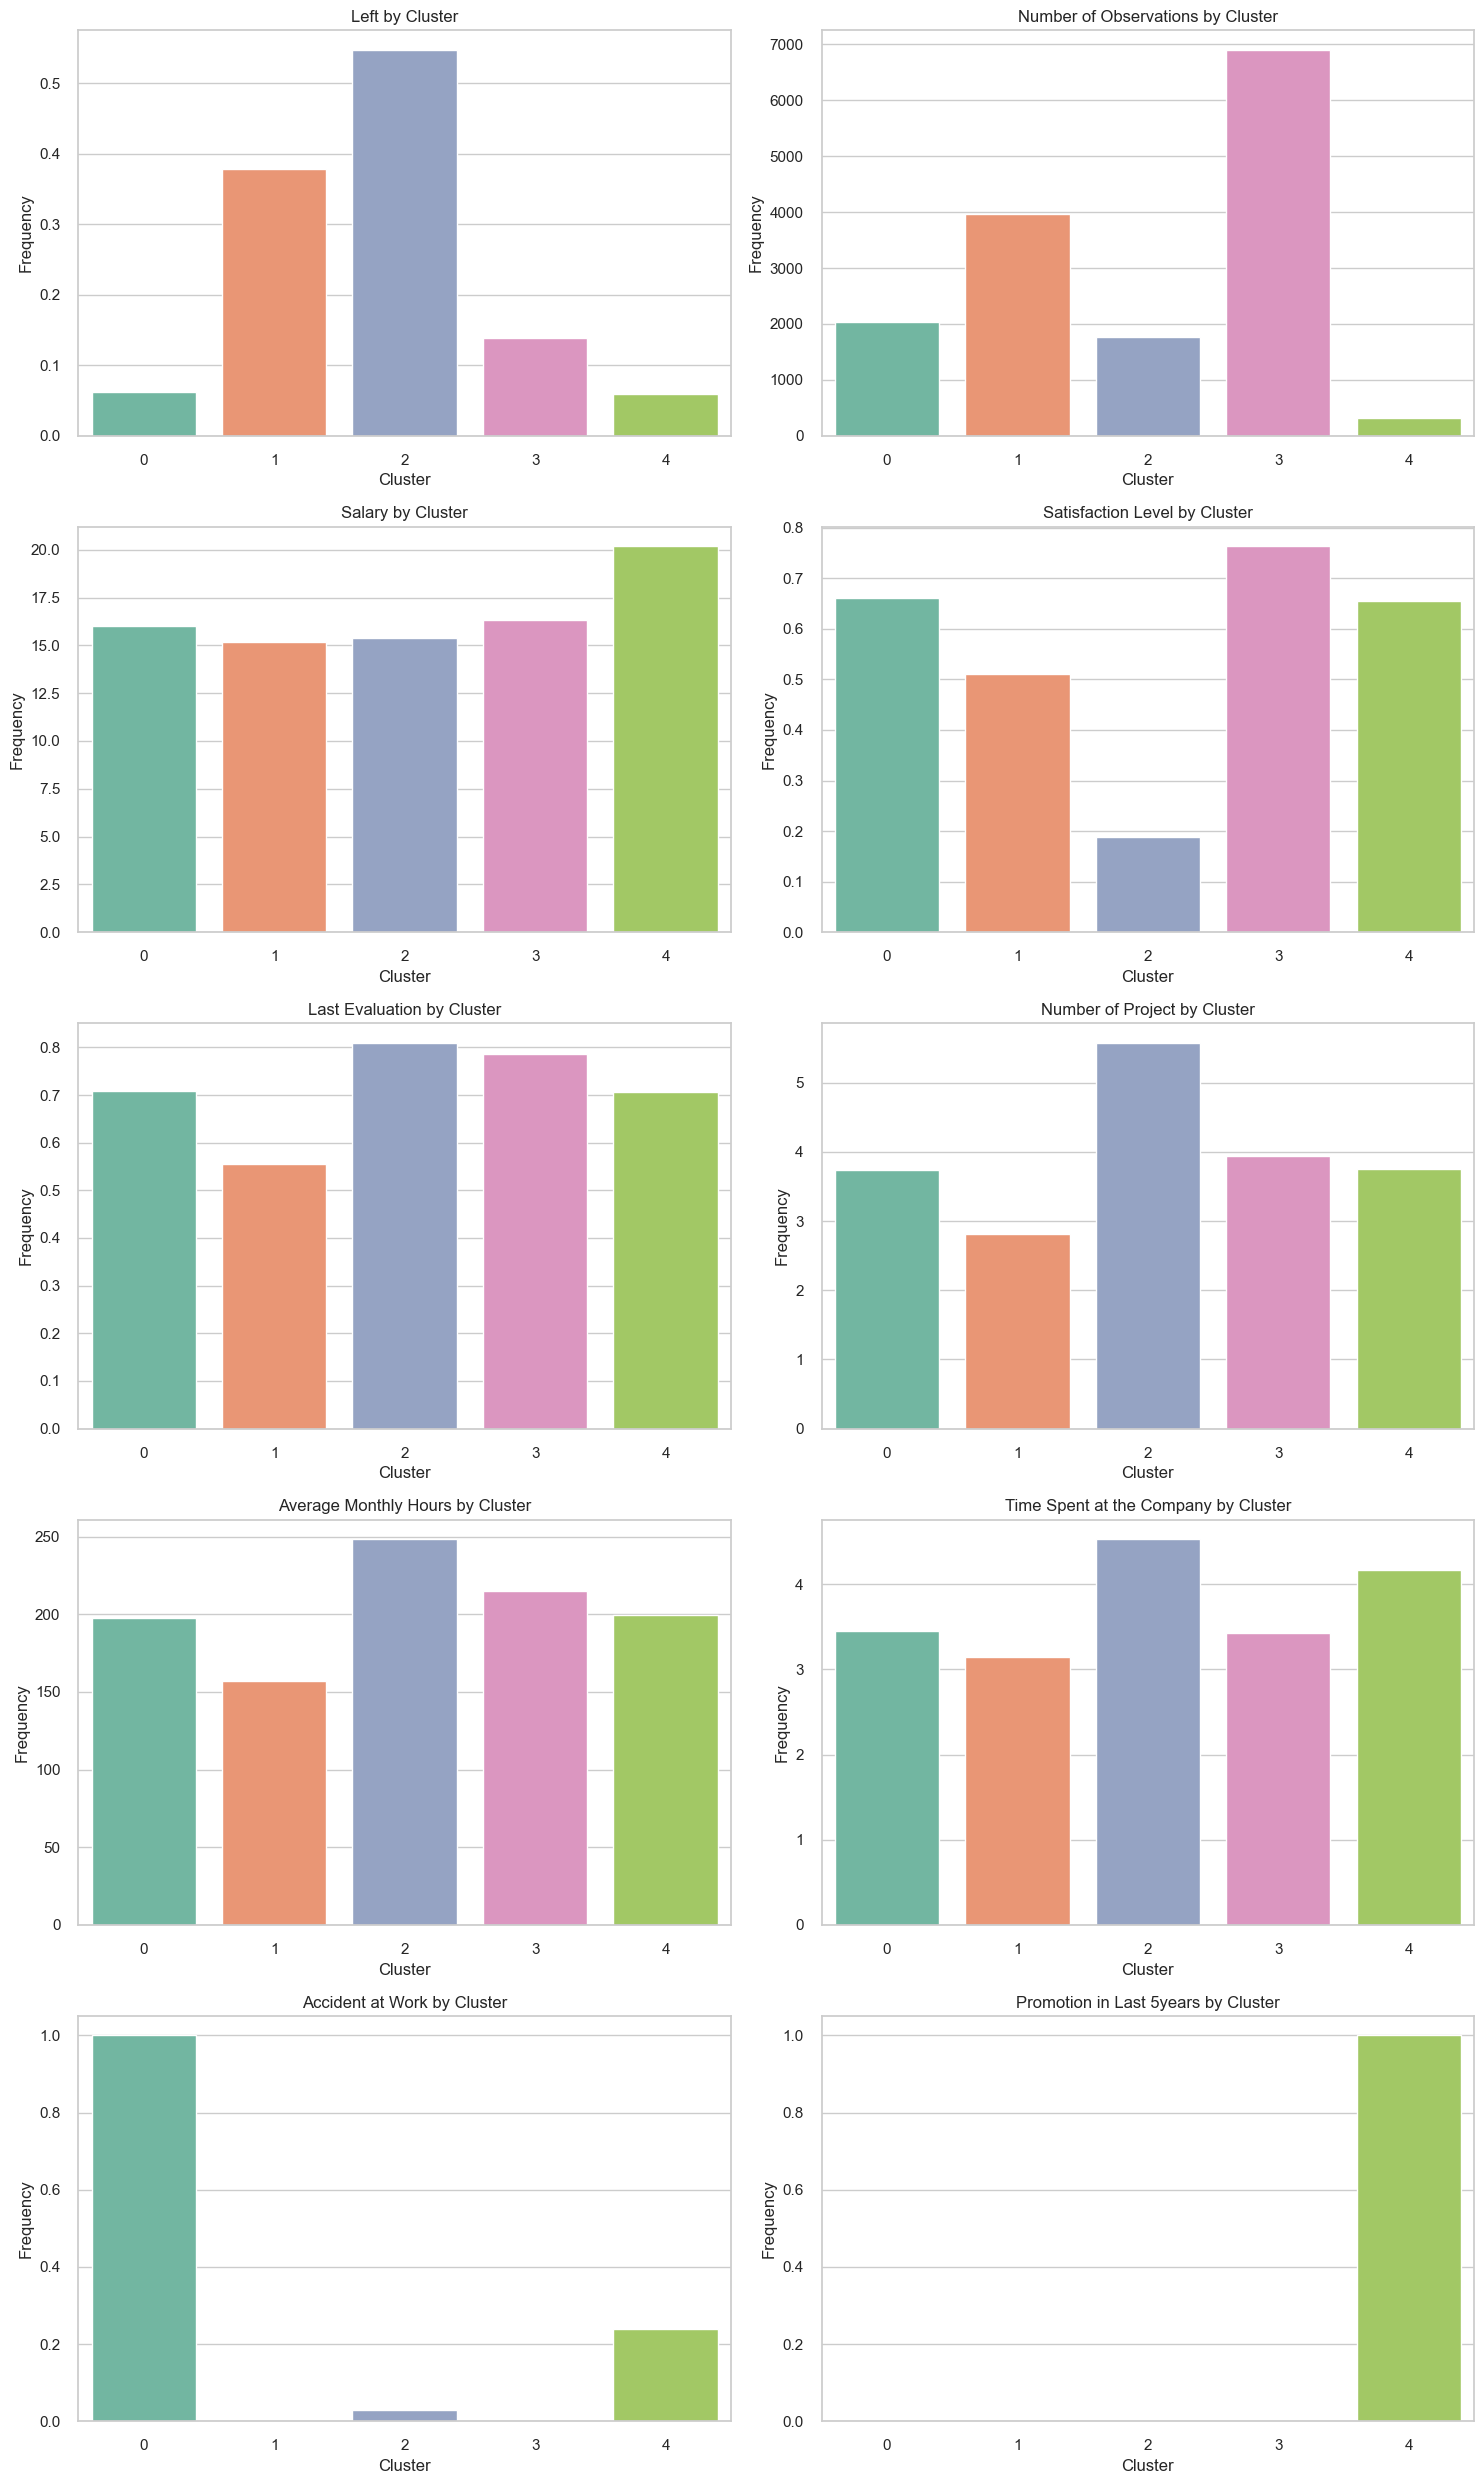

In [139]:
column_names = ['left', 'n', 'salary_num', 'satisfaction_level',
                'last_evaluation', 'number_project', 'average_montly_hours',
                'time_spend_company', 'Work_accident', 'promotion_last_5years']

graph_titles = ["Left", "Number of Observations", "Salary",
                "Satisfaction Level", "Last Evaluation", "Number of Project", 
                "Average Monthly Hours", "Time Spent at the Company" ,
                "Accident at Work", "Promotion in Last 5years"]

num_rows = (len(column_names) + 1) // 2  # Add 1 to ensure even-numbered columns also work
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Loop through each variable and create a histogram
for i, (var, title) in enumerate(zip(column_names, graph_titles)):
    sns.barplot(summary, x="cluster", y=var, palette=sns.color_palette("Set2", n_colors=5), hue="cluster", ax=axes[i], legend=False)
    axes[i].set_title(f'{title} by Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

- **Left by Cluster**: Cluster 2 has the highest number of employees of left.
    - Profiling cluster 2: 
        - Cluster 2 has one of the lowest number of observations amounting to 1765, of which, approximately 54 percent left.
        - Cluster 2 is the least satisfied. This cluster is one of the two clusters that are paid relatively lower salaries.
        - The employees of this cluster are very high performers with an evaluation of approximately 81 percent on an average.
        - This cluster has employees who juggle the highest number of projects, so, end up spending the greatest amount of time working on an average on a monthly basis.
        - Employees in this cluster tend to stay for about 4.5 years on an average with the company. Ergo, they are not new employees.
        - They have not recieved promotions in the last five years.
        - It is fair to conclude that cluster 2, on an average, is representative of individual contributors in this organization.
- **Number of Observations by Cluster**: Cluster 3 has the highest number of observations amounting to 6904
    - Profiling cluster 3 
        - Cluster 3 has the highest number of observations amounting to 6904, of which, approximately 13 percent left.
        - These employees are moderately paid.
        - They express the highest level of satisfaction as compared to other employees.
        - They are good performers evaluated at approximately 78 percent.
        - They juggle a moderate number of projects, and end up spending a relatively higher number of hours working on an average on a monthly basis.
        - The employees in this cluster spend approximately 3 years in the organization on an average and have met with no accidents.
        - The employees in this cluster have not received promotion in the last 5 years.
        - It is fair to conclude that this cluster represents managers and senior level positions.
- **Salary by Cluster**: Cluster 4 is paid the highest salary
    - Profiling clusters 0, 1, and 4  
        - Cluster 4 is paid the highest salary and expresses a relatively higher satisfaction level.
        - It comprises of approximately 6 percent of the employees, hence it is fair to conclude that this cluster largely represents executives.
        - Clusters 0 and 3 are paid medium salaried. They are good performers, juggling a moderate number of projects who stay with the company for approximately 3 years, do not meet accidents and have recieved no promotions in the last five years.
        - Clusters 1 and 2 are paid the lowest salary. They are moderately satisfied.
        - In cluster 1, of 3972, 37 percent have left whereas for cluster 2 with 1765 observations, 54 percent have left the organization. They are very good performers who work on a moderate number of projects and tend to leave the organization by approximately 3-4 years. They have not recieved promotions in the last 5 years. This cluster is representative of individual contributors as well.
- **Number of Projects by Cluster**: Cluster 2 does the highest number of projects. Besides them, cluster 3 does the most projects.
- **Average Monthly Hours by Cluster**:
    - Since cluster 2 does the most number of projects, followed by cluster 3, they end up spending the highest number of hours working on an average at work.
    - Similarly, cluster 1 that does the least number of projects, ends up spending the least amount of time at work.
-  **Accidents at Work by Cluster**: Cluster 4 meets the highest amount of accidents at work but only 5.9 percent of them have left the organization.
- **Satisfaction Level by Cluster**: Cluster 3 shows the highest level of satisfaction.
- **Time Spent in the Company by Cluster**: Cluster 2 spends the most time in the organization.
- **Promotions in the last 5years by Cluster**: Cluster 4 is has recieved the promotions in the last 5 years.
- **Last evaluations by Cluster**: Cluster 2 is highly evaluated at 81 percent. They are excellent performers.

#### Characterizing loyal employees:

- Employees who are paid low salaries leave the most, however, it is interesting to note that so do the employees with medium salaries. Ergo, a higher salary does not guarantee a loyal employee.
- The difference between the clusters who leave regardless of their pay grade is the promotion received in the past five years. Clusters with higher rate of leaving have also received fewer promotions and vice-versa.
- Employees who are least satisfied, as well as, who express a moderate level of satisfaction show a tendency to leave the organization. Ergo, satisfaction of the employees may not make for a loyal employee.
- The employees who left are good performers doing a high number of projects as a result of which they spend greater number of hours at work.
- The employees who left, stayed with the company for about 4-6years during which they met with fewer accidents.